In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") # this will take away the red dialog boxes in the output terminal

In [14]:
#data downloaded frm https://www.kaggle.com/uniabhi/ibm-hr-analytics-employee-attrition-performance
df = pd.read_csv('../Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df['Attrition'] = df['Attrition'].apply(lambda x:x=="Yes")
df['CompanyRatiotoCareer'] = df['YearsAtCompany']/df['TotalWorkingYears']
df['RoleRatioToCompany'] = df['YearsInCurrentRole']/df['YearsAtCompany']
df['RoleRatioToCareer'] = df['YearsInCurrentRole']/df['TotalWorkingYears']

In [15]:
def plot_rates_and_counts(df,x,y,value,cmap='Blues',annot=True):
    for aggfunc in ['count','mean']:
        if aggfunc == "count":
            fmt = '.0f'
            plt.title(f"Counts by {x} and {y}")
        else:
            fmt = '.2f'
            plt.title(f"{aggfunc.capitalize()} {value} by {x} and {y}")
            
            
        heat_df = pd.pivot_table(data=df,columns=x,index=y,values=value,aggfunc=aggfunc).sort_index(ascending=False)
        sns.heatmap(heat_df,cmap=cmap,annot=annot,fmt=fmt,cbar=False,square=False,linecolor='Black',linewidths=0)
        plt.show()

In [16]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'CompanyRatiotoCareer', 'RoleRatioToCompany',
       'RoleRatioToCareer'],
      dtype='object')

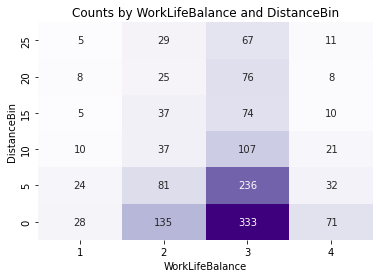

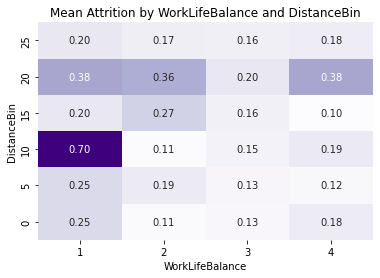

In [6]:
df['MonthlyIncomeBin'] = df['MonthlyIncome'].apply(lambda x:x-x%1000)
df['DistanceBin'] = df['DistanceFromHome'].apply(lambda x:x-x%5)
plot_rates_and_counts(df,"WorkLifeBalance","DistanceBin","Attrition",cmap="Purples")

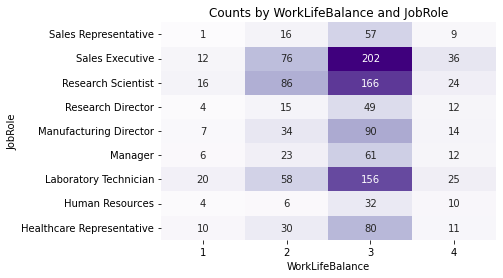

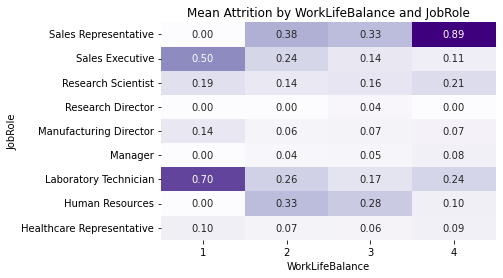

In [45]:
df['RoleRatioToCareerBin'] = df['RoleRatioToCareer'].apply(lambda x:x-x%.1)
plot_rates_and_counts(df,"WorkLifeBalance","JobRole","Attrition",cmap="Purples")

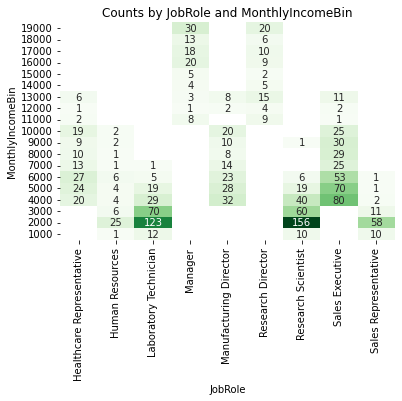

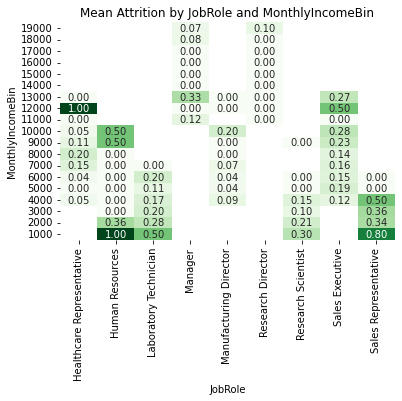

In [38]:
df['MonthlyIncomeBin'] = df['MonthlyIncome'].apply(lambda x:x-x%1000)
plot_rates_and_counts(df,"JobRole","MonthlyIncomeBin","Attrition",cmap="Greens")

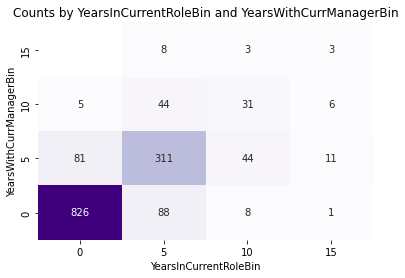

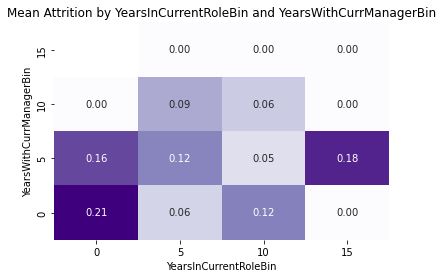

In [56]:
df['YearsInCurrentRoleBin'] = df['YearsInCurrentRole'].apply(lambda x:x-x%5)
df['YearsWithCurrManagerBin'] = df['YearsWithCurrManager'].apply(lambda x:x-x%5)
plot_rates_and_counts(df,"YearsInCurrentRoleBin","YearsWithCurrManagerBin","Attrition",cmap="Purples")